In [331]:
from utilities import data_pipeline, calculate_metrics, plot_results, print_metrics, train_test_split

In [332]:
y_train, y_test = data_pipeline('SG.csv', 'Consumption', 0.8)
y_train /= 1e5
y_test /= 1e5

In [333]:
y_train, y_val = train_test_split(y_train, 0.8)

In [334]:
import tensorflow as tf

seq_length = 1
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    y_train.to_numpy(),
    targets=y_train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    y_val.to_numpy(),
    targets=y_val[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [335]:
univar_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(96, input_shape=[None, 1]),
    tf.keras.layers.Dense(1)  # no activation function by default
])


c:\Users\kinaj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [336]:
def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    #opt = tf.keras.optimizers.Adam()
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    valid_loss, valid_mae = model.evaluate(valid_set)
    return valid_mae * 1e4

In [337]:
fit_and_evaluate(univar_model, train_ds, valid_ds, learning_rate=0.02)

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3832 - mae: 2.8436 - val_loss: 0.3383 - val_mae: 0.5863
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4636 - mae: 0.8335 - val_loss: 0.3549 - val_mae: 0.6852
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2999 - mae: 0.5796 - val_loss: 0.3079 - val_mae: 0.5676
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3071 - mae: 0.5941 - val_loss: 0.3200 - val_mae: 0.6063
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2912 - mae: 0.5723 - val_loss: 0.4170 - val_mae: 0.7721
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3260 - mae: 0.6185 - val_loss: 0.2976 - val_mae: 0.5438
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2723 - mae: 0.5283 - val_loss: 0.3187 - val_mae: 0.6138
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2882 - mae: 0.5551 - val_loss: 0.3184 - val_mae: 0.5954
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.26

4813.7834668159485

In [322]:
import pandas as pd
all_data = pd.concat([y_train, y_val, y_test])[-(seq_length+len(y_test)):]

test_ds = tf.keras.utils.timeseries_dataset_from_array(
    all_data.to_numpy(),
    targets=y_test,
    sequence_length=seq_length,
    batch_size=32
)

In [323]:
univar_model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0479 


[0.004517034161835909, 0.0498369038105011]

In [324]:
y = univar_model.predict(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [325]:
y

array([[0.503305  ],
       [0.6809094 ],
       [0.6994041 ],
       [0.77118546],
       [0.78312576],
       [0.8751756 ],
       [0.8252824 ],
       [0.75115716],
       [0.80436337],
       [0.72144806],
       [0.7189771 ],
       [0.71180904],
       [0.68658566],
       [0.67835957],
       [0.60179317],
       [0.5792488 ],
       [0.57604945],
       [0.5746496 ],
       [0.3376687 ],
       [0.28192723],
       [0.28633118],
       [0.28472927],
       [0.2783207 ],
       [0.28221023],
       [0.27664414],
       [0.2770077 ],
       [0.2792519 ],
       [0.2854033 ],
       [0.28138843],
       [0.27796534],
       [0.2778238 ],
       [0.2776552 ],
       [0.27421165],
       [0.27568263],
       [0.5697248 ],
       [0.5922565 ],
       [0.5436382 ],
       [0.29441944],
       [0.27696246],
       [0.27584624],
       [0.27639973],
       [0.28114274],
       [0.2804667 ],
       [0.2785069 ],
       [0.2884687 ],
       [0.32375267],
       [0.35972497],
       [0.363

In [326]:
y_scaled = (y * 1e5).squeeze()

In [327]:
import matplotlib.pyplot as plt

In [328]:
y_scaled.shape

(289,)

In [329]:
(y_test*1e5 - y_scaled).abs().mean()

4983.690180047789

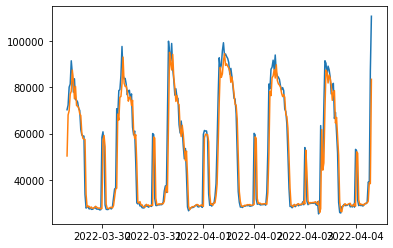

In [330]:
plt.plot(y_test.index, y_test*1e5)
plt.plot(y_test.index, y_scaled)

In [ ]:
y_test[48:]

In [340]:
import tensorflow.keras as keras
keras.src.models.sequential.Sequential

AttributeError: module 'tensorflow.keras' has no attribute 'src'

In [341]:
import numpy

In [344]:
numpy.ndarray

numpy.ndarray